In [ ]:
import spacy
from sklearn.metrics.pairwise import cosine_similarity

# Load a pre-trained spaCy model with word vectors (e.g., 'en_core_web_md')
nlp = spacy.load('en_core_web_md')

# Define the two sentences
sentence1 = "snow on the ground and in the trees"
sentence2 = "It recently snowed."

# Process the sentences with spaCy to get word vectors
doc1 = nlp(sentence1)
doc2 = nlp(sentence2)

# Calculate the cosine similarity between the sentence embeddings
similarity_score = cosine_similarity([doc1.vector], [doc2.vector])[0][0]

print("Similarity Score:", similarity_score)


In [ ]:
!pip install transformers

In [4]:
from transformers import BertTokenizer, BertModel
import torch
from sklearn.metrics.pairwise import cosine_similarity

# Load the BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')




Similarity Score: 0.7837221


In [5]:
# Define the two sentences
sentence1 = "snow on the ground and in the trees"
sentence2 = "It recently snowed."

# Tokenize and encode the sentences
inputs1 = tokenizer(sentence1, return_tensors='pt', padding=True, truncation=True)
inputs2 = tokenizer(sentence2, return_tensors='pt', padding=True, truncation=True)

# Get the BERT embeddings for the sentences
with torch.no_grad():
    outputs1 = model(**inputs1)
    outputs2 = model(**inputs2)

# Extract the embeddings for [CLS] tokens
embeddings1 = outputs1.last_hidden_state[:, 0, :].numpy()
embeddings2 = outputs2.last_hidden_state[:, 0, :].numpy()

# Calculate the cosine similarity between the sentence embeddings
similarity_score = cosine_similarity(embeddings1, embeddings2)[0][0]

print("Similarity Score:", similarity_score)

Similarity Score: 0.7837221


In [12]:
# Define the two sentences
sentence1 = "rain"
sentence2 = "chocolate"

# Tokenize and encode the sentences
inputs1 = tokenizer(sentence1, return_tensors='pt', padding=True, truncation=True)
inputs2 = tokenizer(sentence2, return_tensors='pt', padding=True, truncation=True)

# Get the BERT embeddings for the sentences
with torch.no_grad():
    outputs1 = model(**inputs1)
    outputs2 = model(**inputs2)

# Extract the embeddings for [CLS] tokens
embeddings1 = outputs1.last_hidden_state[:, 0, :].numpy()
embeddings2 = outputs2.last_hidden_state[:, 0, :].numpy()

# Calculate the cosine similarity between the sentence embeddings
similarity_score = cosine_similarity(embeddings1, embeddings2)[0][0]

print("Similarity Score:", similarity_score)

Similarity Score: 0.9563606


In [1]:
!pip install sentence_transformers

In [2]:
from sentence_transformers import SentenceTransformer, util

# Load the pre-trained Sentence Transformers model
model = SentenceTransformer('bert-base-nli-stsb-mean-tokens')




In [4]:
# Define the two sentences
sentence1 = "snow on the ground and in the trees"
sentence2 = "It recently snowed."

# Encode the sentences to get their embeddings
embeddings1 = model.encode(sentence1, convert_to_tensor=True)
embeddings2 = model.encode(sentence2, convert_to_tensor=True)

# Calculate the cosine similarity between the sentence embeddings
similarity_score = util.pytorch_cos_sim(embeddings1, embeddings2)

print("Similarity Score:", similarity_score.item())

Similarity Score: 0.6808727979660034


In [19]:
# Define the two sentences
sentence1 = "snow on the ground and in the trees"
sentence2 = "It is raining."

# Encode the sentences to get their embeddings
embeddings1 = model.encode(sentence1, convert_to_tensor=True)
embeddings2 = model.encode(sentence2, convert_to_tensor=True)

# Calculate the cosine similarity between the sentence embeddings
similarity_score = util.pytorch_cos_sim(embeddings1, embeddings2)

print("Similarity Score:", similarity_score.item())

Similarity Score: 0.44527965784072876


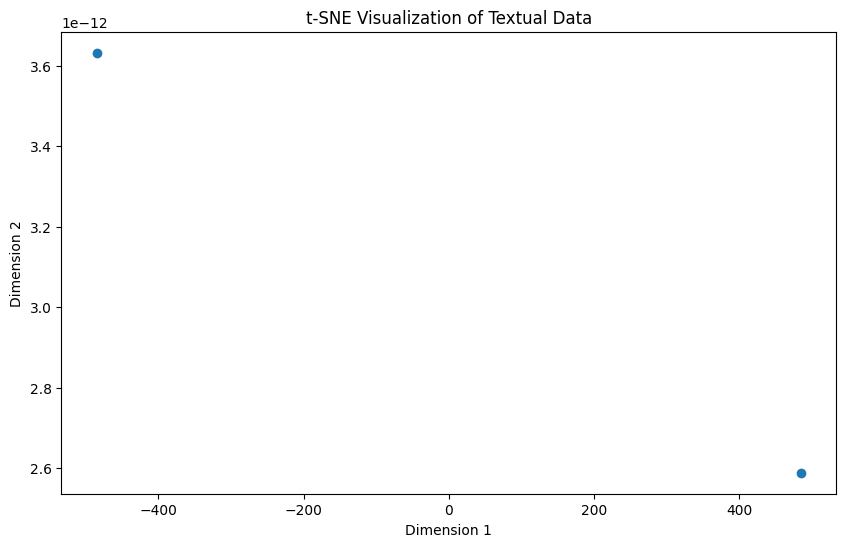

In [3]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from transformers import BertTokenizer, BertModel
import torch

# Example dataset (replace with your actual data)
data = [
    {"clue": "snow on the ground and in the trees"},
    {"clue": "warm coats being worn"},
    # Add more data points as needed
]

# Initialize the BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# Tokenize and encode the textual data
embeddings = []

for item in data:
    text = item["clue"]
    tokens = tokenizer(text, padding=True, truncation=True, return_tensors='pt')
    with torch.no_grad():
        output = model(**tokens)
    embedding = output.last_hidden_state.mean(dim=1).numpy()
    embeddings.append(embedding)

# Stack the embeddings into a single numpy array
embeddings = np.vstack(embeddings)

# Perform t-SNE for dimensionality reduction with a lower perplexity value
tsne = TSNE(n_components=2, perplexity=1, random_state=42)
tsne_embeddings = tsne.fit_transform(embeddings)

# Plot the t-SNE visualization
plt.figure(figsize=(10, 6))
plt.scatter(tsne_embeddings[:, 0], tsne_embeddings[:, 1])
plt.title("t-SNE Visualization of Textual Data")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()



In [2]:
import json
import pandas as pd

In [3]:
with open('/content/sherlock_train_v1_1.json', 'r') as f:
  data = json.load(f)

df = pd.json_normalize(data)
df.tail(10)

,instance_id,inputs.image.url,inputs.image.width,inputs.image.height,inputs.bboxes,inputs.clue,inputs.confidence,inputs.obs_idx,targets.inference
317044,0a0e2bddbd1e7d7b94dc5eac4a9d2105,https://cs.stanford.edu/people/rak248/VG_100K_...,500,333,"[{'height': 153, 'width': 309, 'left': 170, 't...",spices on top of the food,3.0,2,someone just added spices to the mix
317045,ad11d580d91609a01c0fe84c211ae99e,https://cs.stanford.edu/people/rak248/VG_100K/...,500,500,"[{'height': 262, 'width': 214, 'left': 214, 't...",red onions cut in a circle,1.0,0,the person enjoys raw onions
317046,4af4d965808b169cdacd4d590055da7d,https://cs.stanford.edu/people/rak248/VG_100K/...,500,500,"[{'height': 487, 'width': 494, 'left': 0, 'top...",a photo with a black frame,3.0,1,the photo was edited
317047,9e947c31403271b7bda4568b7d4ccf75,https://cs.stanford.edu/people/rak248/VG_100K/...,500,500,"[{'height': 474, 'width': 389, 'left': 26, 'to...",many vegetables close up,1.0,2,the photographer is a foodie
317048,e0e6554e3fdfe9b64142d139d5deb456,http://s3-us-west-2.amazonaws.com/ai2-rowanz/v...,1920,800,"[{'height': 90, 'width': 140, 'left': 897, 'to...",The BMW has a California license plate,2.0,0,This place is in California
317049,10cf00a685cd91aad3920222d02bec27,http://s3-us-west-2.amazonaws.com/ai2-rowanz/v...,1920,800,"[{'height': 44, 'width': 61, 'left': 937, 'top...",There's a BMW logo on the back of the blue car,3.0,1,This car is a BMW
317050,e2b6a92144dd115b18b6d5d5f7d7a3ec,http://s3-us-west-2.amazonaws.com/ai2-rowanz/v...,1920,800,"[{'height': 739, 'width': 1436, 'left': 300, '...",Tall buildings line the street,3.0,2,This is an urban area
317051,95f690be9152a8fb9103cc5203ae14df,https://cs.stanford.edu/people/rak248/VG_100K_...,500,375,"[{'height': 118, 'width': 126, 'left': 153, 't...",the cat sitting on the ground,1.0,0,The cat left the area minutes later to look fo...
317052,7b57b274cd215372817266965ae0aa23,https://cs.stanford.edu/people/rak248/VG_100K_...,500,375,"[{'height': 197, 'width': 498, 'left': 0, 'top...",the plants in the background,1.0,1,The current season in the area is summer.
317053,adda96bebae049ddbe9cd597ffb604c6,https://cs.stanford.edu/people/rak248/VG_100K_...,500,375,"[{'height': 244, 'width': 209, 'left': 291, 't...",the bench attached to the ground,1.0,2,Someone sat on the bench later that day to mee...


In [14]:
inferences = df['targets.inference']

In [ ]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer

data = inferences
# Initialize the Sentence Transformers model
model = SentenceTransformer('bert-base-nli-stsb-mean-tokens')

# Encode the textual data
embeddings = model.encode([item for item in data])

# Perform t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, perplexity=1, random_state=42)
tsne_embeddings = tsne.fit_transform(embeddings)

# Plot the t-SNE visualization
plt.figure(figsize=(10, 6))
plt.scatter(tsne_embeddings[:, 0], tsne_embeddings[:, 1])
plt.title("t-SNE Visualization of Textual Data")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()


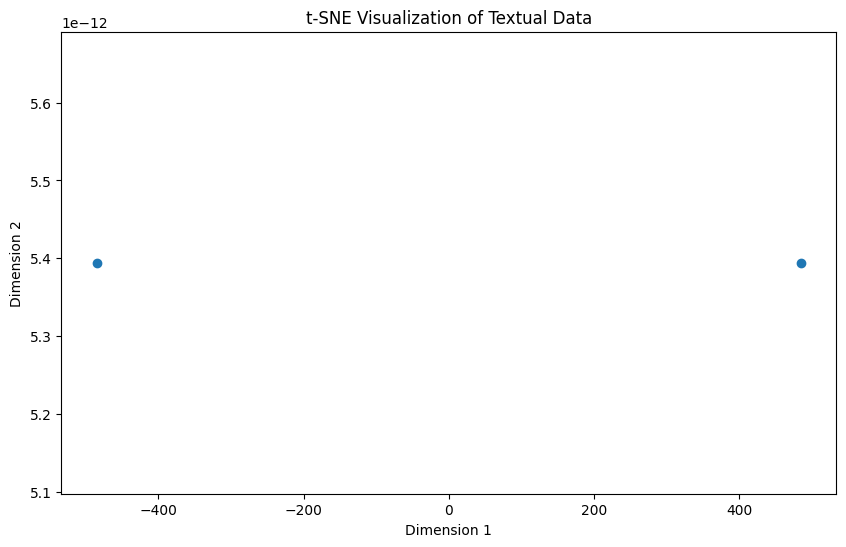

In [7]:
# Example dataset (replace with your actual data)
data = [
    {"clue": "snow "},
    {"clue": "It recently snowed"},
    # Add more data points as needed
]

# Initialize the Sentence Transformers model
model = SentenceTransformer('bert-base-nli-stsb-mean-tokens')

# Encode the textual data
embeddings = model.encode([item["clue"] for item in data])

# Perform t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, perplexity=1, random_state=42)
tsne_embeddings = tsne.fit_transform(embeddings)

# Plot the t-SNE visualization
plt.figure(figsize=(10, 6))
plt.scatter(tsne_embeddings[:, 0], tsne_embeddings[:, 1])
plt.title("t-SNE Visualization of Textual Data")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()

In [ ]:
# Example dataset (replace with your actual data)
data = [
    {"clue": "snow "},
    {"clue": "snow"},
    # Add more data points as needed
]

# Initialize the Sentence Transformers model
model = SentenceTransformer('bert-base-nli-stsb-mean-tokens')

# Encode the textual data
embeddings = model.encode([item["clue"] for item in data])

# Perform t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, perplexity=1, random_state=42)
tsne_embeddings = tsne.fit_transform(embeddings)

# Plot the t-SNE visualization
plt.figure(figsize=(10, 6))
plt.scatter(tsne_embeddings[:, 0], tsne_embeddings[:, 1])
plt.title("t-SNE Visualization of Textual Data")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()

In [ ]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer

# Example dataset (replace with your actual data)
data = [
    {"clue": "snow on the ground and in the trees"},
    {"clue": "warm coats being worn"},
    # Add more data points as needed
]

# Initialize the Sentence Transformers model
model = SentenceTransformer('bert-base-nli-stsb-mean-tokens')

# Encode the textual data
embeddings = model.encode([item["clue"] for item in data])

# Perform t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, perplexity=1, random_state=42)
tsne_embeddings = tsne.fit_transform(embeddings)

# Plot the t-SNE visualization
plt.figure(figsize=(10, 6))
plt.scatter(tsne_embeddings[:, 0], tsne_embeddings[:, 1])
plt.title("t-SNE Visualization of Textual Data")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()
